In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(rf"C:\Users\thuhi\Downloads\rating sheet (6).xlsx")

df.drop(columns=["Corporation size","Financial indicators"],inplace=True)

# Replace any string that is only whitespace with np.nan, then convert to float

df.Year.value_counts()

Year
2019.0    22
2018.0    22
2017.0    22
2021.0    21
2022.0    19
2020.0    19
2024.0    18
2016.0    18
2023.0    17
2015.0    17
2014.0    17
Name: count, dtype: int64

In [65]:
df["Anti-Corruption Measures"][df["Anti-Corruption Measures"] == "0+C2:Z3"] = 0
df["Diversity & Inclusion"] = df["Diversity & Inclusion"].replace(r'^\s*$', np.nan, regex=True)
df["Diversity & Inclusion"] = pd.to_numeric(df["Diversity & Inclusion"], errors='coerce')


C:\Users\thuhi\AppData\Local\Temp\ipykernel_12832\3578984146.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Anti-Corruption Measures"][df["Anti-Corruption Measures"] == "0+C2:Z3"] = 0
C:\Users\thuhi\AppData\Local\Temp\ipykernel_1283

C:\Users\thuhi\AppData\Local\Temp\ipykernel_12832\3469761652.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[score_cols] = df[score_cols].fillna(0)


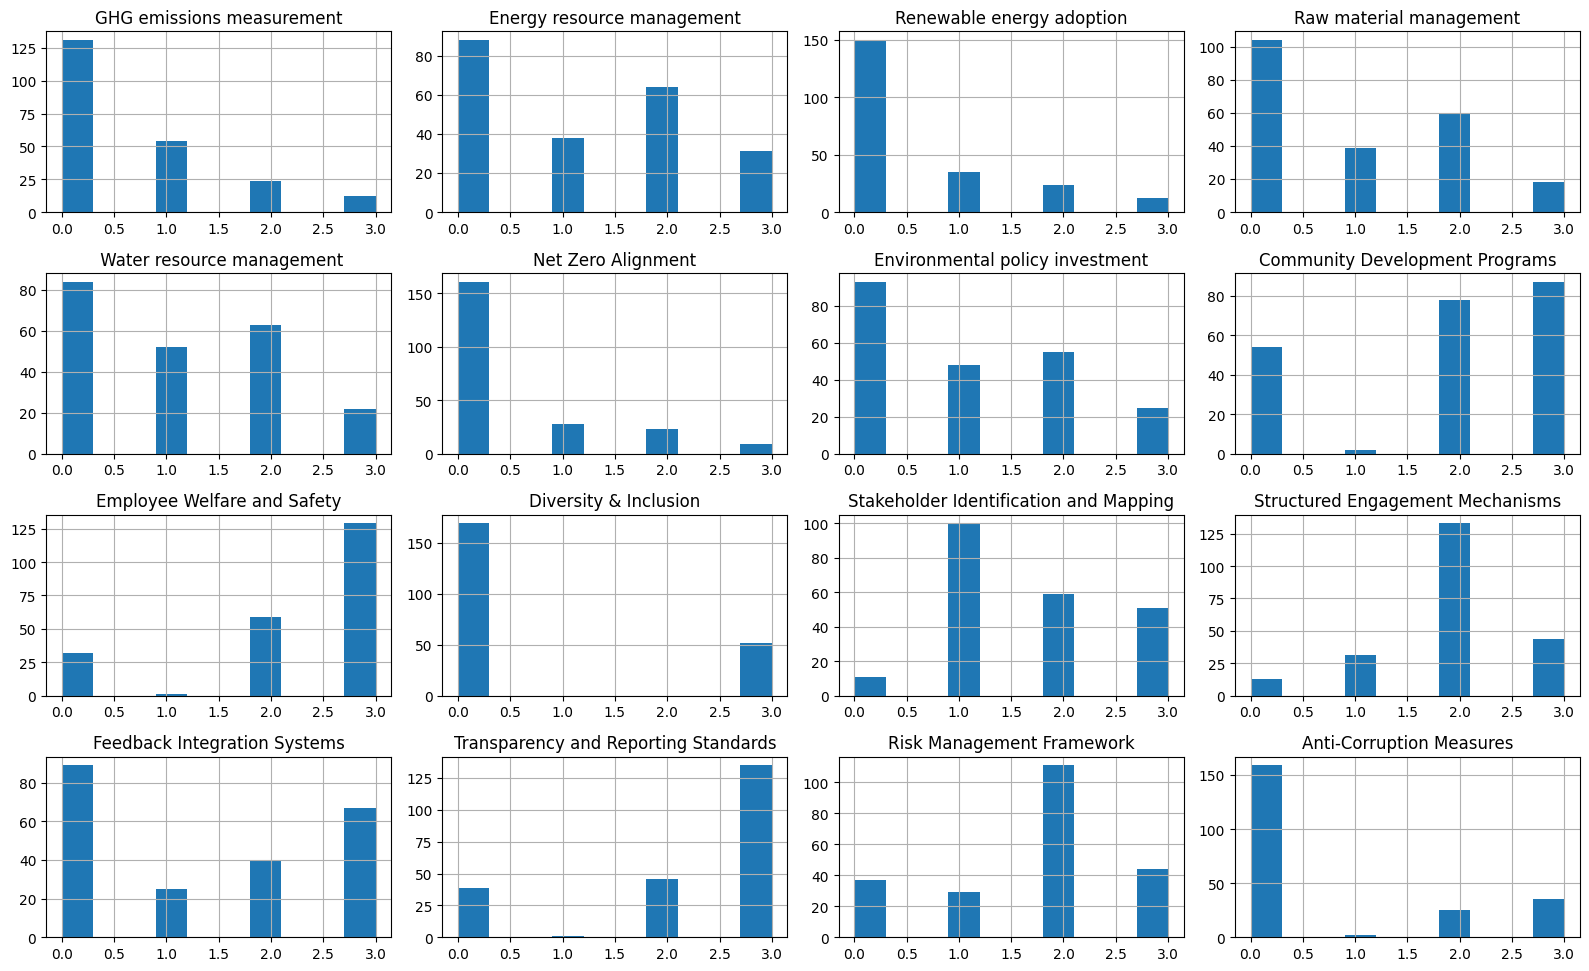

In [66]:
# Plot histogram for all score columns in df
score_cols = [
    "GHG emissions measurement",
    "Energy resource management",
    "Renewable energy adoption",
    "Raw material management",
    " Water resource management",
    "Net Zero Alignment",
    "Environmental policy investment",
    "Community Development Programs",
    "Employee Welfare and Safety",
    "Diversity & Inclusion",
    "Stakeholder Identification and Mapping",
    "Structured Engagement Mechanisms",
    "Feedback Integration Systems",
    "Transparency and Reporting Standards",
    "Risk Management Framework",
    "Anti-Corruption Measures"
]

# Create a flag column if a row had at least 15 NAs in score_cols that were filled
na_flags = df[score_cols].isna()
df['score_cols_filled_count'] = na_flags.sum(axis=1)
df['score_cols_filled_flag'] = (df['score_cols_filled_count'] >= 1).astype(int)

# Fill NA with 0 for plotting
df[score_cols] = df[score_cols].fillna(0)
df[score_cols].hist(figsize=(16, 12), bins=10, layout=(5, 4))

plt.tight_layout()
plt.show()

In [67]:



import matplotlib.pyplot as plt

# Calculate mean of scores and unique count of company names per group
# Calculate environment, social, governance columns for df before grouping
df = df.copy()
df['environment'] = (
    df['GHG emissions measurement'] +
    df['Energy resource management'] +
    df['Renewable energy adoption'] +
    df['Raw material management'] +
    df[' Water resource management'] +
    df['Net Zero Alignment'] +
    df['Environmental policy investment']
)
df['social'] = (
    df['Community Development Programs'] +
    df['Employee Welfare and Safety'] +
    df['Diversity & Inclusion']
)
df['governance'] = (
    df['Stakeholder Identification and Mapping'] +
    df['Structured Engagement Mechanisms'] +
    df['Feedback Integration Systems'] +
    df['Transparency and Reporting Standards'] +
    df['Risk Management Framework'] +
    df['Anti-Corruption Measures']
)

scores = [
    "environment",
    "social",
    "governance"
]

mean_scores = df.groupby(["Industry_Group", "Year"])[scores].mean()
name_count = df.groupby(["Industry_Group"])["Name"].nunique().rename("unique_count")
year_count = df.groupby(["Industry_Group","Year"])["Name"].count().rename("year_count")
# Combine mean scores and name count into a single DataFrame
mean_scores = mean_scores.join(name_count)

mean_scores = mean_scores.join(year_count)

In [68]:
mean_scores[['environment','social','governance','unique_count','year_count']]

environment    social  governance  unique_count  \
Industry_Group Year                                                      
G1             2014.0     2.250000  3.625000    9.000000            21   
               2015.0     3.888889  4.555556    9.222222            21   
               2016.0     5.100000  5.100000    9.200000            21   
               2017.0     4.500000  4.750000    8.750000            21   
               2018.0     5.500000  4.916667    8.750000            21   
               2019.0     5.666667  4.666667    8.833333            21   
               2020.0     6.636364  5.636364    9.000000            21   
               2021.0     7.307692  5.692308    9.000000            21   
               2022.0     7.916667  5.583333    9.166667            21   
               2023.0     8.600000  5.800000    9.900000            21   
               2024.0     7.727273  5.272727    9.454545            21   
G2             2014.0     0.000000  1.750000    7.250000             6   
               2015.0     0.666667  4.000000    9.666667             6   
               2016.0     1.000000  4.666667    9.666667             6   
               2017.0     2.400000  3.800000    8.000000             6   
               2018.0     4.400000  4.800000    9.000000             6   
               2019.0     5.200000  5.800000   10.200000             6   
               2020.0     7.333333  6.666667   10.666667             6   
               2021.0     8.333333  7.000000   13.333333             6   
               2022.0     7.000000  7.500000   11.500000             6   
               2023.0     7.000000  7.500000   11.500000             6   
               2024.0     7.000000  7.500000   11.500000             6   
G3             2014.0     3.750000  2.750000   11.500000             5   
               2015.0     3.750000  3.500000   11.500000             5   
               2016.0     4.500000  4.750000   12.250000             5   
               2017.0     4.500000  4.750000   13.000000             5   
               2018.0     4.500000  6.250000   13.000000             5   
               2019.0     6.250000  6.250000   13.250000             5   
               2020.0    11.500000  6.250000   14.000000             5   
               2021.0    12.000000  6.250000   14.000000             5   
               2022.0    13.000000  6.250000   14.000000             5   
               2023.0    12.500000  6.250000   14.000000             5   
               2024.0    11.250000  5.250000   11.250000             5   
G4             2014.0     7.000000  4.000000   11.000000             6   
               2015.0     7.000000  4.000000   11.000000             6   
               2016.0     7.000000  4.000000   11.000000             6   
               2017.0     7.000000  4.000000   11.000000             6   
               2018.0     7.000000  4.000000   11.000000             6   
               2019.0     7.000000  4.000000   11.000000             6   
               2020.0     7.000000  4.000000   11.000000             6   
               2021.0     7.000000  4.000000   11.000000             6   
               2022.0     7.000000  4.000000   11.000000             6   
               2023.0     7.000000  4.000000   11.000000             6   
               2024.0     7.000000  4.000000   11.000000             6   

                       year_count  
Industry_Group Year                
G1             2014.0           8  
               2015.0           9  
               2016.0          10  
               2017.0          12  
               2018.0          12  
               2019.0          12  
               2020.0          11  
               2021.0          13  
               2022.0          12  
               2023.0          10  
               2024.0          11  
G2             2014.0           4  
               2015.0           3  
               2016.0           3  
               2017.0           5  
      

In [69]:
df[(df['Industry_Group'] == 'G4') & (df['Year'] == 2016)]

,Name,Mã cổ phiếu,Sàn chứng khoán,Year,Have_Website,Post Annual Report,Have sustainability section in annual report,Post separate Sustainability Report,Industry_Group,GHG emissions measurement,...,Structured Engagement Mechanisms,Feedback Integration Systems,Transparency and Reporting Standards,Risk Management Framework,Anti-Corruption Measures,score_cols_filled_count,score_cols_filled_flag,environment,social,governance
142,CTCP Hoá - Dược phẩm Mekophar,MKP,UPCOM,2016.0,1.0,1.0,0.0,0.0,G4,1.0,...,2.0,1.0,2.0,2.0,2,0,0,7.0,4.0,11.0


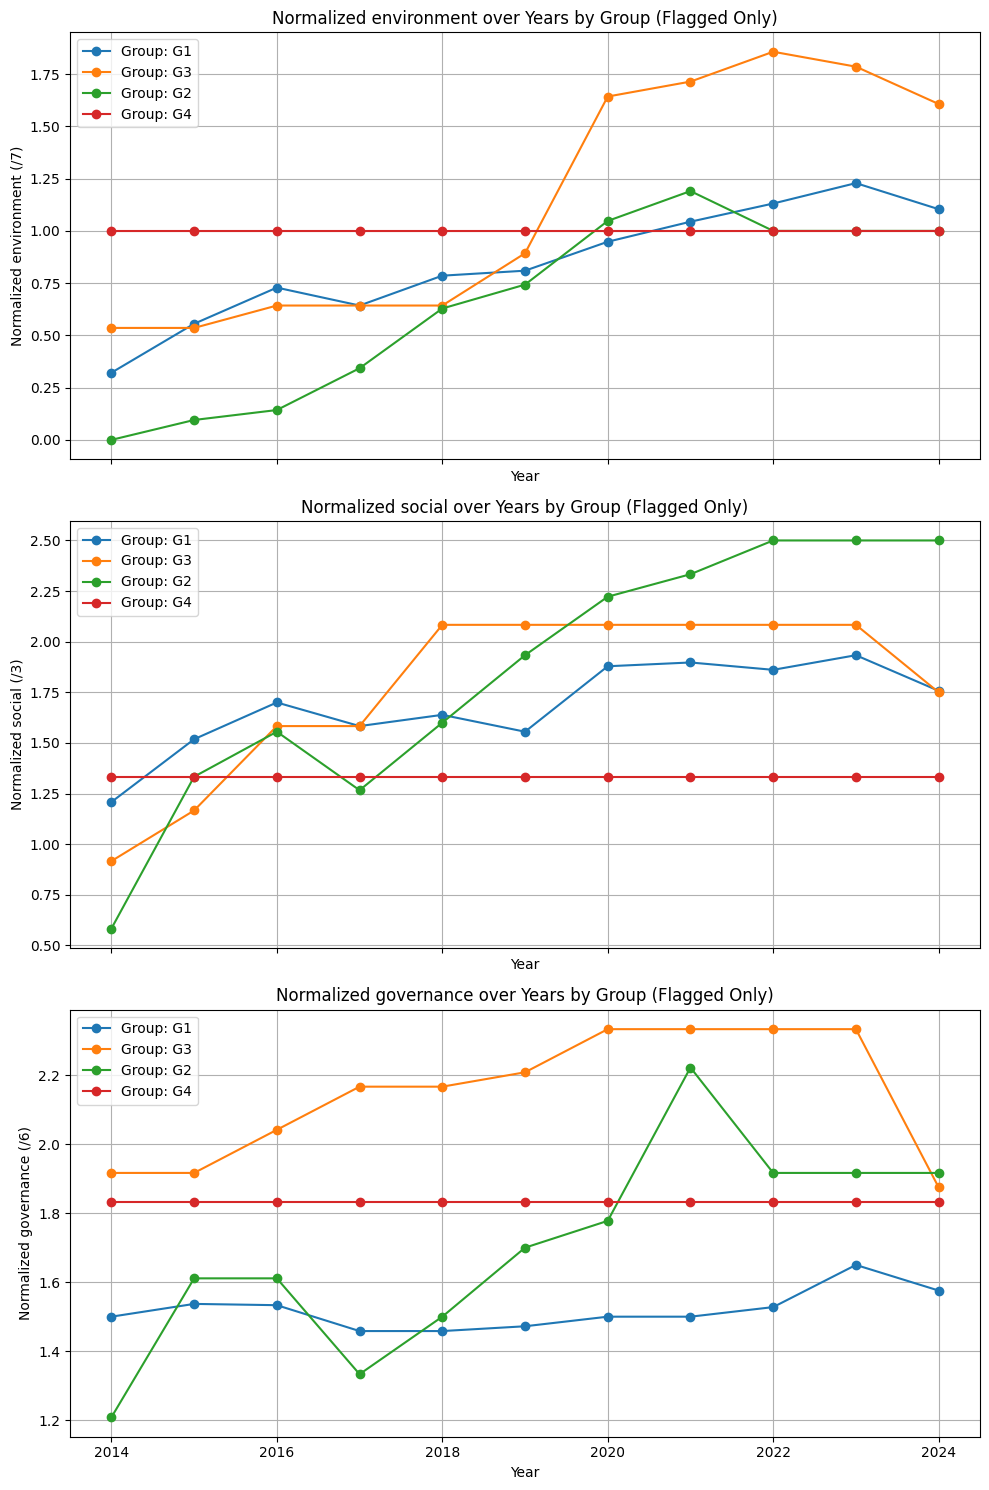

In [70]:
# --- Cell 9: Normalize mean_scores before plotting ---

features = ['environment', 'social', 'governance']
divisors = {'environment': 7, 'social': 3, 'governance': 6}
years = mean_scores.index.get_level_values(1).unique()
groups = mean_scores.index.get_level_values(0).unique()

# Only plot groups where at least one row is flagged as filled
flagged_groups = df.loc[df['score_cols_filled_flag'] == 0, 'Industry_Group'].unique()

fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)), sharex=True)

if len(features) == 1:
    axes = [axes]

for ax, feature in zip(axes, features):
    for group in flagged_groups:
        if group in mean_scores.index.get_level_values(0):
            data = mean_scores.loc[group]
            normed = data[feature] / divisors[feature]
            ax.plot(data.index, normed, marker='o', label=f'Group: {group}')
    ax.set_title(f'Normalized {feature} over Years by Group (Flagged Only)')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Normalized {feature} (/{divisors[feature]})')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [71]:

df['environment'] = (
    df['GHG emissions measurement'] +
    df['Energy resource management'] +
    df['Renewable energy adoption'] +
    df['Raw material management'] +
    df[' Water resource management'] +
    df['Net Zero Alignment'] +
    df['Environmental policy investment']
)
df['social'] = (
    df['Community Development Programs'] +
    df['Employee Welfare and Safety'] +
    df['Diversity & Inclusion']
)
df['governance'] = (
    df['Stakeholder Identification and Mapping'] +
    df['Structured Engagement Mechanisms'] +
    df['Feedback Integration Systems'] +
    df['Transparency and Reporting Standards'] +
    df['Risk Management Framework'] +
    df['Anti-Corruption Measures']
)

df[df['score_cols_filled_flag'] == 0].groupby(['Year'])[['environment', 'social', 'governance']].mean()

# Add year_count (number of records per year)
yearly_scores['year_count'] = df.groupby('Year').size()

# Add unique_count (number of unique companies per year)
yearly_scores['unique_count'] = df.groupby('Year')['Name'].nunique()



In [72]:
yearly_scores


,environment,social,governance,year_count,unique_count
Year,,,,,
2014.0,2.352941,3.000000,9.294118,17,17
2015.0,3.470588,4.176471,9.941176,17,17
2016.0,4.388889,4.888889,10.055556,18,18
2017.0,4.136364,4.500000,9.454545,22,22
2018.0,5.136364,5.090909,9.681818,22,22
2019.0,5.727273,5.181818,10.045455,22,22
2020.0,7.789474,5.842105,10.421053,19,19
2021.0,8.333333,5.904762,10.666667,21,21
2022.0,8.842105,5.842105,10.526316,19,19


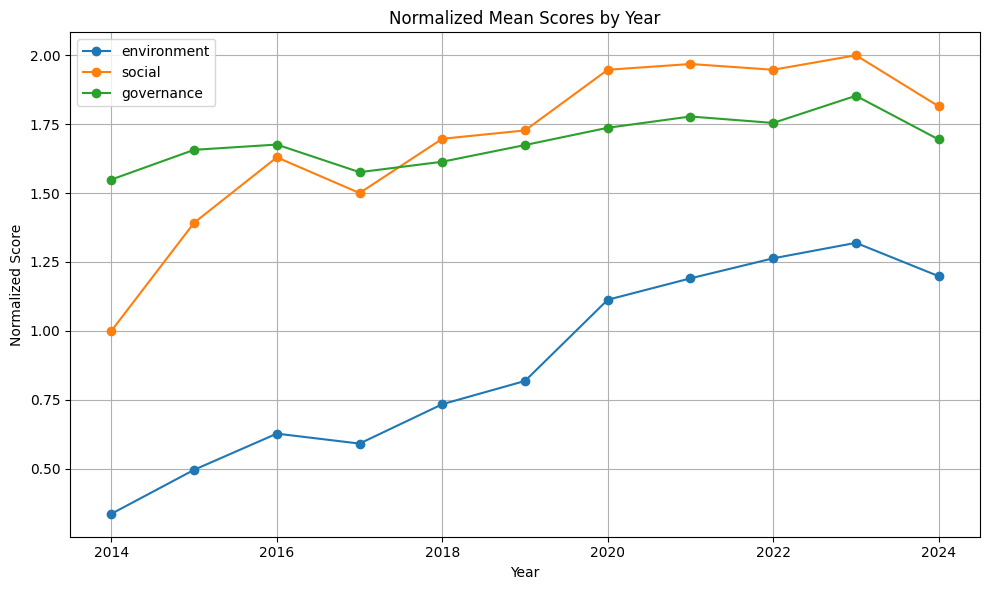

In [73]:
# --- Cell 11: Normalize yearly_scores before plotting ---

plt.figure(figsize=(10, 6))
divisors = {'environment': 7, 'social': 3, 'governance': 6}
for feature in ['environment', 'social', 'governance']:
    normed = yearly_scores[feature] / divisors[feature]
    plt.plot(yearly_scores.index, normed, marker='o', label=feature)

plt.title('Normalized Mean Scores by Year')
plt.xlabel('Year')
plt.ylabel('Normalized Score')
plt.legend(title='score_cols_filled_flag = 0 only')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

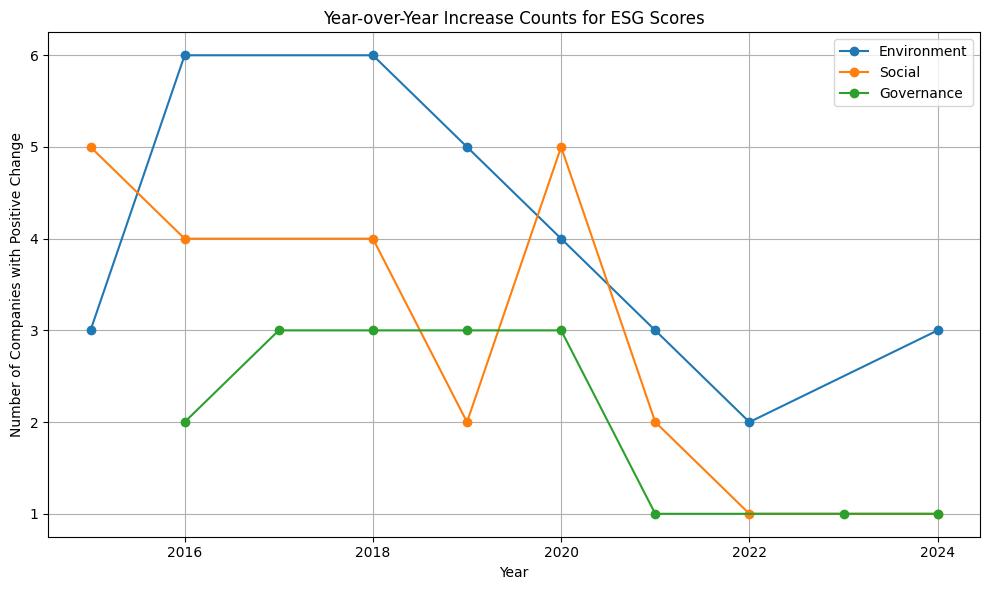

In [74]:
import matplotlib.pyplot as plt

# Calculate year-over-year increase counts for each ESG dimension
esg_cols = ['environment', 'social', 'governance']
df_sorted = df.sort_values(['Name', 'Year'])

# Calculate year-over-year difference for each company
diffs = df_sorted.groupby('Name')[esg_cols + ['Year']].apply(
    lambda group: group.set_index('Year')[esg_cols].diff()
).reset_index()

# Merge back company names for clarity
diffs['Name'] = df_sorted['Name'].values

# For each year and each ESG dimension, count companies with positive change
increase_counts = {}
for col in esg_cols:
    # Only count positive changes (exclude NaN from first year)
    yearly = diffs[diffs[col] > 0].groupby('Year')[col].count()
    increase_counts[col] = yearly

# Plot
plt.figure(figsize=(10, 6))
for col in esg_cols:
    plt.plot(increase_counts[col].index, increase_counts[col].values, marker='o', label=col.capitalize())

plt.title('Year-over-Year Increase Counts for ESG Scores')
plt.xlabel('Year')
plt.ylabel('Number of Companies with Positive Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Chart: Year-over-Year Increase Counts for ESG Scores

The line charts above display the annual count of companies that achieved a positive year-over-year increase in each ESG dimension—`environment`, `social`, and `governance`. For each chart, the x-axis represents the years, while the y-axis indicates the number of companies with an improvement in the respective ESG score compared to the previous year. This metric provides a dynamic view of progress, focusing on the prevalence of positive change rather than absolute score levels.

These charts are particularly useful for assessing the momentum of ESG improvement across the dataset. Peaks in the lines suggest periods when a large number of companies made significant strides in a particular dimension, potentially in response to new regulations, industry initiatives, or shifts in stakeholder expectations. Conversely, troughs may indicate challenging periods, such as economic downturns or increased operational difficulties, when fewer companies were able to advance their ESG performance.

By examining the patterns across different ESG dimensions, stakeholders can identify whether improvements are occurring in isolation or as part of a broader, coordinated effort. For example, simultaneous peaks in `environment` and `governance` may reflect the rollout of comprehensive sustainability programs, while divergent trends could signal varying levels of emphasis or success across dimensions.

The charts also facilitate the identification of persistent leaders—companies that consistently achieve year-over-year gains—and those that struggle to maintain progress. This information can inform targeted support, resource allocation, and the sharing of best practices. Additionally, the visualization helps contextualize aggregate trends, revealing whether observed improvements are widespread or concentrated among a few high performers.

In essence, these charts provide a dynamic, action-oriented perspective on ESG evolution, highlighting the frequency and distribution of positive change within the corporate landscape.

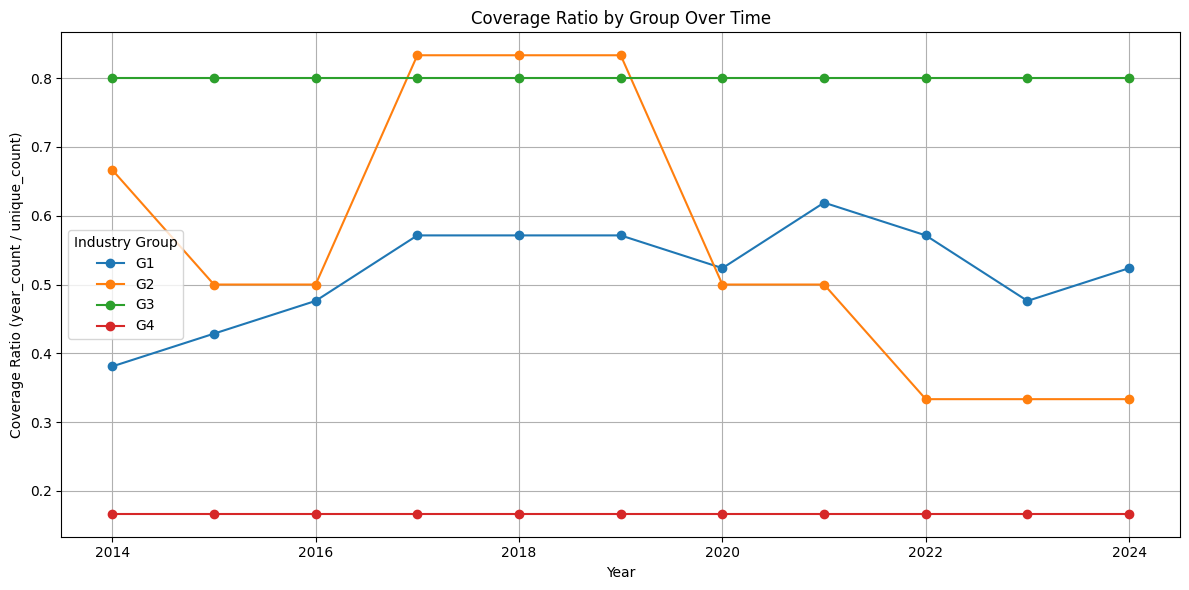

In [75]:
import matplotlib.pyplot as plt

# Calculate coverage_ratio for each group and year
mean_scores = mean_scores.copy()
mean_scores['coverage_ratio'] = mean_scores['year_count'] / mean_scores['unique_count']

groups = mean_scores.index.get_level_values(0).unique()
years = mean_scores.index.get_level_values(1).unique()

plt.figure(figsize=(12, 6))
for group in groups:
    group_data = mean_scores.loc[group]
    plt.plot(group_data.index, group_data['coverage_ratio'], marker='o', label=f'{group}')

plt.title('Coverage Ratio by Group Over Time')
plt.xlabel('Year')
plt.ylabel('Coverage Ratio (year_count / unique_count)')
plt.legend(title='Industry Group')
plt.grid(True)
plt.tight_layout()
plt.show()

### Chart: Coverage Ratio by Group Over Time

The chart above illustrates the coverage ratio for each industry group over time, where the coverage ratio is defined as the number of records (`year_count`) divided by the number of unique companies (`unique_count`) for each group and year. This metric provides insight into the consistency and completeness of ESG reporting within each group.

A coverage ratio close to 1 indicates that, on average, each unique company in the group is represented once per year, suggesting comprehensive and regular data collection. Ratios above 1 may indicate multiple records per company per year, possibly due to repeated reporting or data duplication, while ratios below 1 could signal missing data or inconsistent reporting practices.

By examining the trends in coverage ratio across groups and years, stakeholders can assess the reliability of the dataset and identify periods or groups with potential data quality issues. For example, a declining coverage ratio in a particular group may highlight challenges in data collection or reduced participation, whereas a stable or increasing ratio suggests robust and sustained engagement.

This visualization is valuable for both data analysts and decision-makers, as it contextualizes the ESG scores and trends observed elsewhere in the analysis. Understanding coverage helps ensure that observed changes in ESG performance are not artifacts of shifting data completeness, but rather reflect genuine developments within the corporate landscape.